In [1]:
# pip install geopandas
# conda install geopandas
# pip install contextily

In [2]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from sklearn.preprocessing import StandardScaler
# from geodatasets import get_path
from shapely import wkt
from shapely.geometry import Point

In [3]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [4]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))
lowres = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\mered\AppData\Local\Temp\ipykernel_27592\4289000791.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
C:\Users\mered\AppData\Local\Temp\ipykernel_27592\4289000791.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nybb = gpd.read_file(gpd.datasets.get_path('nybb'))
C:\Users\mered\AppData\Local\Temp\ipykernel_27592\4289000791.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  lo

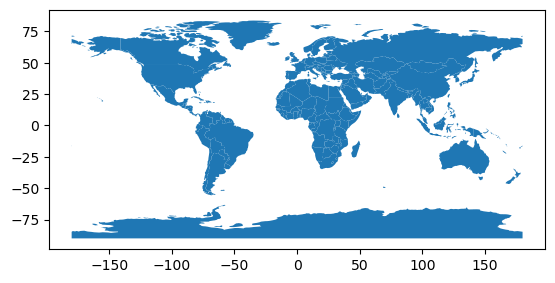

In [5]:
lowres.plot()
plt.show()

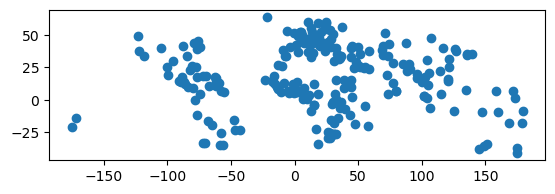

In [6]:
cities.plot()
plt.show()

In [7]:
# Increase number of rows/columns that will be visible
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 45)

In [8]:
# Read in data set
denver_full = pd.read_csv('denver_09.23_listings.csv')

# Add a 'city' column
denver_full['city'] = 'Denver'

# Check dataframe
denver_full.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,...,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,360,https://www.airbnb.com/rooms/360,20230924144343,2023-09-24,city scrape,Guesthouse in Denver · ★4.99 · 2 bedrooms · 2 ...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,https://www.airbnb.com/users/show/666,Jennifer & Giovanni,2008-07-08,"Denver, CO",We are artists and tinkerers.\r\n \r\nWe enjoy...,within an hour,100%,97%,t,https://a0.muscache.com/im/users/666/profile_p...,https://a0.muscache.com/im/users/666/profile_p...,Highland,3,4,"['email', 'phone']",t,t,"Denver, Colorado, United States",Highland,NaN,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,NaN,1 bath,...,"[""Extra pillows and blankets"", ""First aid kit""...",$90.00,30,90,30,30,90,90,30.0,90.0,NaN,t,4,27,57,147,2023-09-24,179,7,0,2018-08-13,2023-08-05,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2017-BFN-0002177,f,2,2,0,0,2.87,Denver
1,364,https://www.airbnb.com/rooms/364,20230924144343,2023-09-24,city scrape,Loft in Denver · ★4.85 · 1 bedroom · 1 bed · 1...,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,https://www.airbnb.com/users/show/783,Jason,2008-07-11,"Denver, CO","I travel pretty frequently, I spend a lot of t...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/783/profile_p...,https://a0.muscache.com/im/users/783/profile_p...,Five Points,1,1,"['email', 'phone']",t,t,"Denver, Colorado, United States",Five Points,NaN,39.766720,-104.979060,Entire loft,Entire home/apt,3,NaN,1.5 baths,...,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",$179.00,185,365,185,185,365,365,185.0,365.0,NaN,t,23,53,83,358,2023-09-24,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,NaN,f,1,1,0,0,0.50,Denver
2,590,https://www.airbnb.com/rooms/590,20230924144343,2023-09-24,city scrape,Home in Denver · ★4.85 · 1 bedroom · 1 bed · 1...,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/d84d5bc6-f7cb...,933,https://www.airbnb.com/users/show/933,Jill,2008-07-21,"Denver, CO",I am friendly and I love meeting people from a...,within an hour,100%,95%,t,https://a0.muscache.com/im/users/933/profile_p...,https://a0.muscache.com/im/users/933/profile_p...,North Park Hill,2,2,"['email', 'phone']",t,t,"Denver, Colorado, United States",North Park Hill,NaN,39.755110,-104.911090,Private room in home,Private room,3,NaN,1 shared bath,...,"[""First aid kit"", ""Cooking basics"", ""Dishwashe...",$64.00,1,300,1,1,300,300,1.0,300.0,NaN,t,5,27,53,233,2023-09-24,712,43,2,2009-03-29,2023-08-27,

In [9]:
# Columns to remove

list_columns_to_remove = ["listing_url", "scrape_id", "last_scraped", "source", "name","neighborhood_overview", "picture_url", "host_url", "host_name", "host_about", "host_thumbnail_url",
                          "host_picture_url", "host_listings_count", "host_total_listings_count", "host_neighbourhood", "host_verifications", "neighbourhood", "neighbourhood_group_cleansed", "bathrooms",
                          "minimum_nights", "maximum_nights",  "maximum_minimum_nights", "minimum_minimum_nights", "minimum_maximum_nights",
                          "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calendar_updated", "calendar_last_scraped",
                          "first_review", "last_review", "license", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms",
                          "calculated_host_listings_count_shared_rooms", "host_location", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost"]

# Subset dropped columns

denver = denver_full.drop(columns=list_columns_to_remove)
denver.head()

,id,description,host_id,host_since,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",$90.00,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2.87,Denver
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",$179.00,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,0.50,Denver
2,590,"Large guest room in my home, where I also live...",933,2008-07-21,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,1 shared bath,NaN,1.0,"[""First aid kit"", ""Cooking basics"", ""Dishwashe...",$64.00,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,4.04,Denver
3,592,This room is in the basement. It does not hav...,933,2008-07-21,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,1 shared bath,NaN,1.0,"[""Dishwasher"", ""Cooking basics"", ""Stove"", ""Fir...",$57.00,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,0.95,Denver
4,686,Thanks for visiting my Queen Bed Room site for...,990,2008-07-23,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,1 private bath,NaN,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",$33.00,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,1.39,Denver


In [10]:
# row count
num_rows = len(denver)
print(f"Number of rows in denver is: {num_rows}")

Number of rows in denver is: 5388


In [11]:
# check that amenities column has data. Initially started with data scraped at 12.23, but it did not include amenities
# data, so reverted to 09.23 dataset.
# denver['amenities'].head()

In [12]:
# remove $ and commas in price column
denver['price'] = denver['price'].replace('[\$,]', '', regex=True).astype(float)

denver['price'].head()


0     90.0
1    179.0
2     64.0
3     57.0
4     33.0
Name: price, dtype: float64

In [13]:
# in 'bathrooms_text' column convert various 'half-bath' wording with .5 to be able to have a numeric value for number of bathrooms
# split bathrooms_text column into 2 columns to separate number and words, use RegEx to parse numbers from words
# convert new 'bath_number' column to float data type

denver['bathrooms_text'] = denver['bathrooms_text'].replace({'Half-bath': '.5 bath ', 'Private half-bath': '.5 private bath', 'Shared half-bath': '.5 shared bath'})
denver[['bath_number', 'bath_text']] = denver['bathrooms_text'].str.split(r'(\d+\.?\d*)', n=1, expand=True).iloc[:, 1:3]
denver['bath_number'] = denver['bath_number'].astype(float)

# denver.head()

In [14]:
denver['bathrooms_text'].value_counts()

bathrooms_text
1 bath              2777
2 baths              838
2.5 baths            351
1 private bath       338
1.5 baths            270
1 shared bath        218
3 baths              167
3.5 baths            164
4 baths               61
1.5 shared baths      51
2 shared baths        46
4.5 baths             36
0 baths               32
5 baths               10
5.5 baths              7
4 shared baths         5
6 baths                3
6.5 baths              3
17 shared baths        2
.5 bath                2
2.5 shared baths       2
3 shared baths         2
9.5 baths              1
Name: count, dtype: int64

In [15]:
# Drop bathrooms_text column as the data has been parsed into new columns
denver = denver.drop(columns='bathrooms_text')
# denver.head()

In [16]:
# Remove records with number_of_reviews = 0

denver_nulls_removed = denver.loc[(denver["number_of_reviews"] > 0)] 
denver_nulls_removed = denver_nulls_removed.loc[(denver_nulls_removed["bedrooms"].notnull())]


In [17]:
denver_nulls_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3844 entries, 0 to 5357
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3844 non-null   int64  
 1   description                  3841 non-null   object 
 2   host_id                      3844 non-null   int64  
 3   host_since                   3844 non-null   object 
 4   host_has_profile_pic         3844 non-null   object 
 5   host_identity_verified       3844 non-null   object 
 6   neighbourhood_cleansed       3844 non-null   object 
 7   latitude                     3844 non-null   float64
 8   longitude                    3844 non-null   float64
 9   property_type                3844 non-null   object 
 10  room_type                    3844 non-null   object 
 11  accommodates                 3844 non-null   int64  
 12  bedrooms                     3844 non-null   float64
 13  beds                   

In [18]:
# denver_review_nulls_removed.info()

null_counts = denver_nulls_removed.isnull().sum().sort_values(ascending=False)
null_counts_over0 = null_counts[null_counts > 0]
row_count_check = len(denver_nulls_removed)
print(null_counts_over0)
print(f"row count {row_count_check}")

beds                           13
description                     3
review_scores_location          2
review_scores_accuracy          2
review_scores_cleanliness       2
review_scores_communication     2
bath_text                       2
review_scores_value             2
bath_number                     2
review_scores_checkin           2
dtype: int64
row count 3844


In [19]:
#remove remaining null records

denver_nulls_removed = denver_nulls_removed.dropna()
null = denver_nulls_removed.isnull().sum().sort_values(ascending=False)
null_over0 = null[null > 0]
print(null_over0)
rows = len(denver_nulls_removed)
print(f"row count {rows}")


Series([], dtype: int64)
row count 3824


In [20]:
###############################################################################################################
# Creating Geometry

In [21]:
# Create geometry column for listing location

denver_nulls_removed['listing_geometry'] = denver_nulls_removed.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

geodf = gpd.GeoDataFrame(denver_nulls_removed, geometry="listing_geometry")
geodf.head()

,id,description,host_id,host_since,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,bath_number,bath_text,listing_geometry
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2.87,Denver,1.0,bath,POINT (-105.00210 39.76641)
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,0.50,Denver,1.5,baths,POINT (-104.97906 39.76672)
7,31503,CORONA VIRUS RESPONSIBLE - ESSENTIAL WORKERS W...,135298,2010-05-30,t,t,West Highland,39.761790,-105.028450,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Radiant heating"", ""Extra pillows and blanket...",103.0,t,12,42,72,347,159,27,3,4.91,4.92,5.00,4.95,4.99,4.88,4.88,f,1.00,Denver,1.0,bath,POINT (-105.02845 39.76179)
8,39405,Enjoy our oasis in the city and stay at one of...,666,2008-07-08,t,t,Highland,39.766053,-105.003078,Entire cottage,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Cooking basics...",136.0,t,6,7,32,114,667,35,3,4.92,4.88,4.93,4.98,4.97,4.85,4.85,f,4.17,Denver,1.0,bath,POINT (-105.00308 39.76605)
10,154999,This condo is right in the heart of Downtown D...,745200,2011-06-26,t,t,CBD,39.744390,-104.989270,Entire condo,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Dishwasher"", ""...",162.0,t,0,0,0,139,11,0,0,4.70,4.40,4.70,4.70,4.90,4.90,4.60,f,0.07,Denver,1.0,bath,POINT (-104.98927 39.74439)


In [22]:
# Create variables for test attraction and lat/long coordinates, converted to decimal format.
attract1 = "union_station"
lat1 = 39.75305556
long1 = -105.000000

# Create columns with fixed values for above variables
geodf['attraction1'] = attract1

geodf.head()

,id,description,host_id,host_since,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,bath_number,bath_text,listing_geometry,attraction1
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2.87,Denver,1.0,bath,POINT (-105.00210 39.76641),union_station
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,0.50,Denver,1.5,baths,POINT (-104.97906 39.76672),union_station
7,31503,CORONA VIRUS RESPONSIBLE - ESSENTIAL WORKERS W...,135298,2010-05-30,t,t,West Highland,39.761790,-105.028450,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Radiant heating"", ""Extra pillows and blanket...",103.0,t,12,42,72,347,159,27,3,4.91,4.92,5.00,4.95,4.99,4.88,4.88,f,1.00,Denver,1.0,bath,POINT (-105.02845 39.76179),union_station
8,39405,Enjoy our oasis in the city and stay at one of...,666,2008-07-08,t,t,Highland,39.766053,-105.003078,Entire cottage,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Cooking basics...",136.0,t,6,7,32,114,667,35,3,4.92,4.88,4.93,4.98,4.97,4.85,4.85,f,4.17,Denver,1.0,bath,POINT (-105.00308 39.76605),union_station
10,154999,This condo is right in the heart of Downtown D...,745200,2011-06-26,t,t,CBD,39.744390,-104.989270,Entire condo,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Dishwasher"", ""...",162.0,t,0,0,0,139,11,0,0,4.70,4.40,4.70,4.70,4.90,4.90,4.60,f,0.07,Denver,1.0,bath,POINT (-104.98927 39.74439),union_station


In [23]:
# Create geometry column for attraction 1

# long1 and lat1 are variables defined above
point_geometry = Point(long1, lat1)

geodf['attract1_geometry'] = [point_geometry] * len(geodf)

# set CRS format for new column
geodf = gpd.GeoDataFrame(geodf, geometry='attract1_geometry', crs="EPSG:4326")


geodf.head()

,id,description,host_id,host_since,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,bath_number,bath_text,listing_geometry,attraction1,attract1_geometry
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2.87,Denver,1.0,bath,POINT (-105.00210 39.76641),union_station,POINT (-105.00000 39.75306)
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,0.50,Denver,1.5,baths,POINT (-104.97906 39.76672),union_station,POINT (-105.00000 39.75306)
7,31503,CORONA VIRUS RESPONSIBLE - ESSENTIAL WORKERS W...,135298,2010-05-30,t,t,West Highland,39.761790,-105.028450,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Radiant heating"", ""Extra pillows and blanket...",103.0,t,12,42,72,347,159,27,3,4.91,4.92,5.00,4.95,4.99,4.88,4.88,f,1.00,Denver,1.0,bath,POINT (-105.02845 39.76179),union_station,POINT (-105.00000 39.75306)
8,39405,Enjoy our oasis in the city and stay at one of...,666,2008-07-08,t,t,Highland,39.766053,-105.003078,Entire cottage,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Cooking basics...",136.0,t,6,7,32,114,667,35,3,4.92,4.88,4.93,4.98,4.97,4.85,4.85,f,4.17,Denver,1.0,bath,POINT (-105.00308 39.76605),union_station,POINT (-105.00000 39.75306)
10,154999,This condo is right in the heart of Downtown D...,745200,2011-06-26,t,t,CBD,39.744390,-104.989270,Entire condo,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Dishwasher"", ""...",162.0,t,0,0,0,139,11,0,0,4.70,4.40,4.70,4.70,4.90,4.90,4.60,f,0.07,Denver,1.0,bath,POINT (-104.98927 39.74439),union_station,POINT (-105.00000 39.75306)


In [24]:
null = geodf.isnull().sum().sort_values(ascending=False)
null_over0 = null[null>0]
print(null_over0)

Series([], dtype: int64)


In [25]:
# Create geometry column for geometric object of attraction 1 if the lat/long are in separate columns

# denver['attraction1_geometry'] = denver.apply(lambda row: Point(row['long1'], row['lat1']), axis=1)

# geodf = gpd.GeoDataFrame(denver, geometry="attraction1_geometry")
# geodf.head()

In [26]:
# set geometry column

geodf = geodf.set_geometry('listing_geometry')

In [27]:
# set the CRS of the 'listing_geometry' column to EPSG: 4326

geodf = geodf.set_crs("EPSG:4326", allow_override=True)

In [28]:
# Create top attraction dataframe

top_attraction_gdf = gpd.GeoDataFrame({
    'attraction': ['union station'],
    'geometry': [Point(-104.9903, 39.7392)]
    
}, crs="EPSG:4326")

# Convert to Web Mercator
top_attraction_gdf = top_attraction_gdf.to_crs(epsg=3857)


C:\Users\mered\AppData\Local\Temp\ipykernel_27592\3188974502.py:30: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  top_attraction_gdf.plot(ax=ax, color='none', edgecolor='blue', linewidth=2, label='Attraction Buffer', column='buffer')


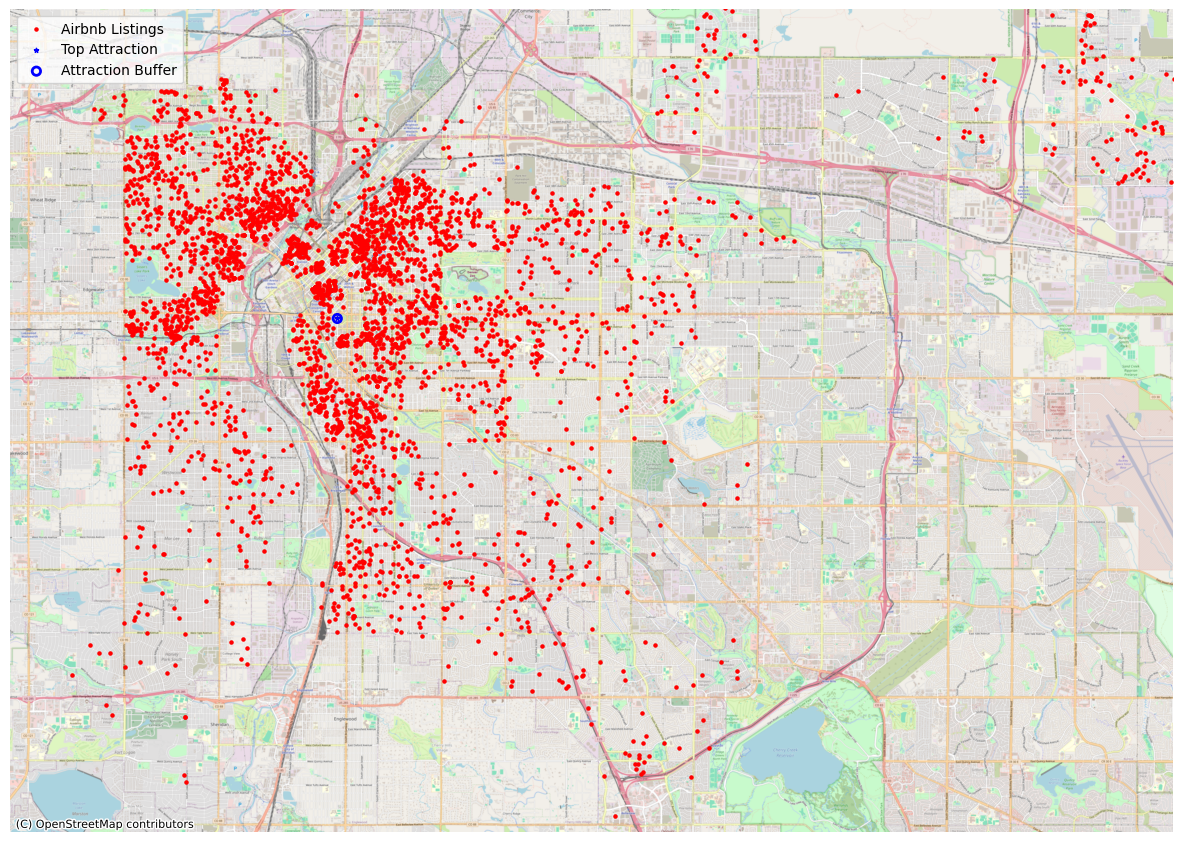

In [29]:
# Assuming 'airbnb_gdf' is your GeoDataFrame with Airbnb listings in EPSG:4326
# and 'attractions_gdf' is another GeoDataFrame with top 5 Denver attractions, also in EPSG:4326
# Make sure both GeoDataFrames have a 'geometry' column with Point geometries

# Convert GeoDataFrames to Web Mercator (EPSG:3857) for contextily
airbnb_gdf = geodf.to_crs(epsg=3857)


# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot Airbnb listings
airbnb_gdf.plot(ax=ax, color='red', markersize=5, label='Airbnb Listings')

# Optionally, set the bounds manually if you want to zoom in to a specific area
# ax.set_xlim([min_x, max_x])
# ax.set_ylim([min_y, max_y])

# Calculate buffer around the top attraction (e.g., 1000 meters radius)
buffer_radius = 8046.72  # meters = 5 miles
top_attraction_gdf['buffer'] = top_attraction_gdf.buffer(buffer_radius)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=14)

# Plot top attraction
top_attraction_gdf.plot(ax=ax, color='blue', marker='*', markersize=10, label='Top Attraction')

# Plot buffer as circle around top attraction
top_attraction_gdf.plot(ax=ax, color='none', edgecolor='blue', linewidth=2, label='Attraction Buffer', column='buffer')

# Adjust axes to fit the plot
ax.set_xlim([airbnb_gdf.total_bounds[0] + 1000, airbnb_gdf.total_bounds[2] - 1000])
ax.set_ylim([airbnb_gdf.total_bounds[1] + 1000, airbnb_gdf.total_bounds[3] - 1000])

# Adding legend
ax.legend()

# Remove axis clutter
ax.axis('off')

# plt.legend()
plt.show()

In [30]:
# airbnb_gdf has the listing geometry in meters (epsg=3857) and attraction geometry in EPSG:4326
# airbnb_gdf.head()

In [31]:
from pyproj import Proj, transform

# Define the projection for geographic coordinates and Web Mercator
proj_latlon = Proj(init='epsg:4326')
proj_web_mercator = Proj(init='epsg:3857')

# Denver's geographic coordinates
lat, lon = 39.7392, -104.9903

# Convert to EPSG:3857
x, y = transform(proj_latlon, proj_web_mercator, lon, lat)

print(f"Web Mercator Coordinates for Denver: x={x}, y={y}")

Web Mercator Coordinates for Denver: x=-11687466.734233031, y=4828115.596032435


c:\Users\mered\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\mered\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\mered\AppData\Local\Temp\ipykernel_27592\2391358278.py:11: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = trans

C:\Users\mered\AppData\Local\Temp\ipykernel_27592\1433578844.py:15: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  top_attraction_gdf.plot(ax=ax, color='none', edgecolor='blue', linewidth=2, label='Attraction Buffer', column='buffer')


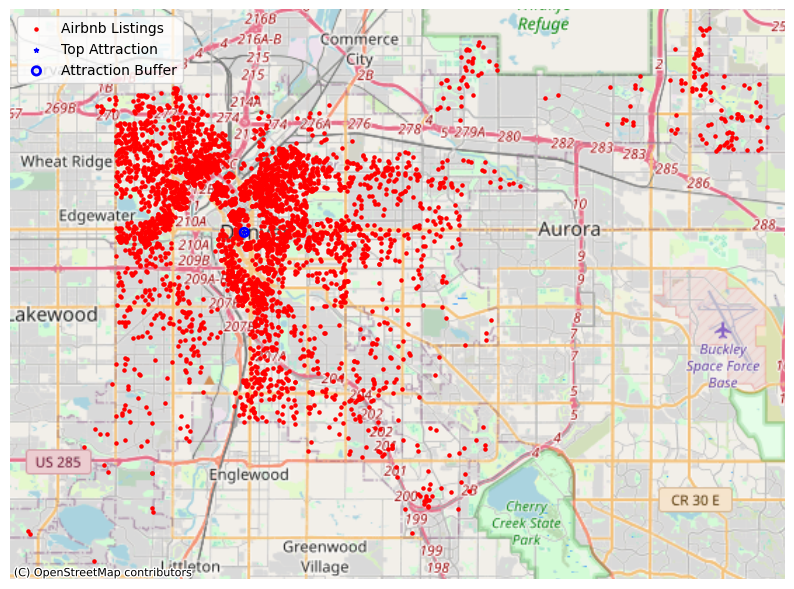

In [32]:
# Calculate buffer around the top attraction (e.g., 1000 meters radius)
buffer_radius = 1000  # meters
top_attraction_gdf['buffer'] = top_attraction_gdf.buffer(buffer_radius)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Airbnb listings
airbnb_gdf.plot(ax=ax, color='red', markersize=5, label='Airbnb Listings')

# Plot top attraction
top_attraction_gdf.plot(ax=ax, color='blue', marker='*', markersize=10, label='Top Attraction')

# Plot buffer as circle around top attraction
top_attraction_gdf.plot(ax=ax, color='none', edgecolor='blue', linewidth=2, label='Attraction Buffer', column='buffer')

# Adjust axes to fit the plot
ax.set_xlim([airbnb_gdf.total_bounds[0] - 1000, airbnb_gdf.total_bounds[2] + 1000])
ax.set_ylim([airbnb_gdf.total_bounds[1] - 1000, airbnb_gdf.total_bounds[3] + 1000])


# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Remove axis clutter
ax.axis('off')

plt.legend()
plt.show()

In [33]:
##################################################################################################
# Scaling and Transforming Data

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a list of columns with true/false data to be transformed using OneHotEncoder
true_false = ["host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"]

In [35]:
# Create a list of column names for numeric data types to prepare to use StandardScaler.
num_cols_df = geodf.select_dtypes(include = 'number')

num_cols_names = num_cols_df.columns.tolist()

print(num_cols_names)

['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'bath_number']


In [36]:
# Use list comprehension to remove some of the numeric columns

cols_to_excl = ['id', 'host_id', 'latitude', 'longitude', 'lat1', 'long1']

filtered_col_names = [col for col in num_cols_names if col not in cols_to_excl]

print(filtered_col_names)

['accommodates', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'bath_number']


In [37]:
id = geodf[['id']].reset_index(drop=True)
id.head()


,id
0,360
1,364
2,31503
3,39405
4,154999


In [38]:
# Apply preprocessing steps selectively across different column types using ColumnTransformer from scikit-learn

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), filtered_col_names),
        ('bool', OneHotEncoder(drop='if_binary'), true_false)])

denver_transformed = preprocessor.fit_transform(geodf)

denver_transformed

array([[-0.60513285,  0.0229956 , -0.27251187, ...,  1.        ,
         1.        ,  0.        ],
       [-0.60513285, -0.89299564, -0.89428119, ...,  1.        ,
         1.        ,  0.        ],
       [-0.98404689, -0.89299564, -0.89428119, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.53160926,  0.93898683,  0.34925745, ...,  1.        ,
         1.        ,  0.        ],
       [-0.98404689, -0.89299564, -0.89428119, ...,  1.        ,
         1.        ,  0.        ],
       [-0.98404689, -0.89299564, -0.89428119, ...,  1.        ,
         1.        ,  0.        ]])

In [39]:
# get transformed feature names

transformed_feature_names = preprocessor.get_feature_names_out()

transformed_feature_names

array(['num__accommodates', 'num__bedrooms', 'num__beds', 'num__price',
       'num__availability_30', 'num__availability_60',
       'num__availability_90', 'num__availability_365',
       'num__number_of_reviews', 'num__number_of_reviews_ltm',
       'num__number_of_reviews_l30d', 'num__review_scores_rating',
       'num__review_scores_accuracy', 'num__review_scores_cleanliness',
       'num__review_scores_checkin', 'num__review_scores_communication',
       'num__review_scores_location', 'num__review_scores_value',
       'num__reviews_per_month', 'num__bath_number',
       'bool__host_has_profile_pic_t', 'bool__host_identity_verified_t',
       'bool__has_availability_t', 'bool__instant_bookable_t'],
      dtype=object)

In [40]:
# convert transformed array to DataFrame

initial_transformed_df = pd.DataFrame(denver_transformed, columns=transformed_feature_names)

denver_transformed_df = pd.concat([id, initial_transformed_df], axis=1)
denver_transformed_df.head()


,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,num__number_of_reviews_l30d,num__review_scores_rating,num__review_scores_accuracy,num__review_scores_cleanliness,num__review_scores_checkin,num__review_scores_communication,num__review_scores_location,num__review_scores_value,num__reviews_per_month,num__bath_number,bool__host_has_profile_pic_t,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t
0,360,-0.605133,0.022996,-0.272512,-0.094069,-0.573394,0.098246,0.430164,-0.217297,1.180776,-0.460152,-0.717779,0.462765,0.412750,0.410414,0.344268,0.312725,0.549662,0.429755,0.390792,-0.660068,1.0,1.0,1.0,0.0
1,364,-0.605133,-0.892996,-0.894281,-0.052210,1.460414,1.425416,1.285470,1.454591,0.243813,-0.790527,-0.717779,-0.003633,-0.309877,-0.118403,0.154824,0.179511,-0.672621,-0.138045,-0.749753,-0.084840,1.0,1.0,1.0,0.0
2,31503,-0.984047,-0.892996,-0.894281,-0.087955,0.282946,0.863921,0.923610,1.367431,0.977088,0.483775,0.691972,0.196252,0.171874,0.551432,0.154824,0.279422,0.130594,0.344585,-0.509132,-0.660068,1.0,1.0,1.0,0.0
3,39405,-0.984047,-0.892996,-0.894281,-0.072434,-0.359309,-0.922655,-0.392244,-0.478777,6.150755,0.861346,0.691972,0.229566,0.034231,0.304651,0.268490,0.212815,0.025826,0.259415,1.016408,-0.660068,1.0,1.0,1.0,0.0
4,154999,-0.984047,-0.892996,-0.894281,-0.060206,-1.001564,-1.279970,-1.444927,-0.280686,-0.530201,-0.790527,-0.717779,-0.503344,-1.617489,-0.506202,-0.792392,-0.020310,0.200438,-0.450335,-0.956688,-0.660068,1.0,1.0,1.0,0.0


In [41]:
null_counts_2 = geodf.isnull().sum().sort_values(ascending=False)
null_counts_2_over0 = null_counts_2[null_counts_2 > 0]
print(null_counts_2_over0)

Series([], dtype: int64)


In [42]:
null_counts_3 = denver_transformed_df.isnull().sum().sort_values(ascending=False)
null_counts_3_over0 = null_counts_3[null_counts_3 > 0]
print(null_counts_3_over0)

Series([], dtype: int64)


In [43]:
denver_transformed_df.value_counts('bool__instant_bookable_t')

bool__instant_bookable_t
0.0    2759
1.0    1065
Name: count, dtype: int64

In [57]:
# check row count agrees for transformed dataframe and the source dataframe the will be concatenated with it.

row = len(denver_transformed_df)
row2 = len(geodf)
print(f"denver_transformed_df {row}")
print(f"geodf {row}")

denver_transformed_df 3824
geodf 3824


In [45]:
# Reset index in original and transformed dataframes
#geodf = geodf.reset_index(drop=True)
#denver_transformed_df = denver_transformed_df.reset_index(drop=True)

# Concatenate along the columns
merged_transformed_df = pd.merge(denver_transformed_df, geodf, on='id', how='inner')
merged_transformed_df.head()

,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,num__number_of_reviews_l30d,num__review_scores_rating,num__review_scores_accuracy,num__review_scores_cleanliness,num__review_scores_checkin,num__review_scores_communication,num__review_scores_location,num__review_scores_value,num__reviews_per_month,num__bath_number,bool__host_has_profile_pic_t,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t,description,host_id,host_since,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city,bath_number,bath_text,listing_geometry,attraction1,attract1_geometry
0,360,-0.605133,0.022996,-0.272512,-0.094069,-0.573394,0.098246,0.430164,-0.217297,1.180776,-0.460152,-0.717779,0.462765,0.412750,0.410414,0.344268,0.312725,0.549662,0.429755,0.390792,-0.660068,1.0,1.0,1.0,0.0,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2.87,Denver,1.0,bath,POINT (-105.00210 39.76641),union_station,POINT (-105.00000 39.75306)
1,364,-0.605133,-0.892996,-0.894281,-0.052210,1.460414,1.425416,1.285470,1.454591,0.243813,-0.790527,-0.717779,-0.003633,-0.309877,-0.118403,0.154824,0.179511,-0.672621,-0.138045,-0.749753,-0.084840,1.0,1.0,1.0,0.0,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,0.50,Denver,1.5,baths,POINT (-104.97906 39.76672),union_station,POINT (-105.00000 39.75306)
2,31503,-0.984047,-0.892996,-0.894281,-0.087955,0.282946,0.863921,0.923610,1.367431,0.977088,0.483775,0.691972,0.196252,0.171874,0.551432,0.154824,0.279422,0.130594,0.344585,-0.509132,-0.660068,1.0,1.0,1.0,0.0,CORONA VIRUS RESPONSIBLE - ESSENTIAL WORKERS W...,135298,2010-05-30,t,t,West Highland,39.761790,-105.028450,Entire guest suite,Entire home/apt,2,1.0,1.0,"[""Radiant heating"", ""Extra pillows and blanket...",103.0,t,12,42,72,347,159,27,3,4.91,4.92,5.00,4.95,4.99,4.88,4.88,f,1.00,Denver,1.0,bath,POINT (-105.02845 39.76179),union_station,POINT (-105.00000 39.75306)
3,39405,-0.984047,-0.892996,-0.894281,-0.072434,-0.359309,-0.922655,-0.392244,-0.478777,6.150755,0.861346,0.691972,0.229566,0.034231,0.304651,0.268490,0.212815,0.025826,0.259415,1.016408,-0.660068,1.0,1.0,1.0,0.0,Enjoy our oasis in the city and stay at one of...,666,2008-07-08,t,t,Highland,39.766053,-105.003078,Entire cottage,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Cooking basics...",136.0,t,6,7,32,114,667,35,3,4.92,4.88,4.93,4.98,4.97,4.85,4.85,f,4.17,Denver,1.0,bath,POINT (-105.00308 39.76605),union_station,POINT (-105.00000 39.75306)
4,154999,-0.984047,-0.892996,-0.894281,-0.060206,-1.001564,-1.279970,-1.444927,-0.280686,-0.530201,-0.790527,-0.717779,-0.503344,-1.617489,-0.506202,-0.792392,-0.020310,0.200438,-0.450335,-0.956688,-0.660068,1.0,1.0,1.0,0.0,This condo is right in the heart of Downtown D...,745200,2011-06-26,t,t,CBD,39.744390,-104.989270,Entire condo,Entire home/apt,2,1.0,1.0,"[""Extra pillows and blankets"", ""Dishwasher"", ""...",162.0,t,0,0,0,139,11,0,0,4.70,4.40,4.70,4.70,4.90,4.90,4.60,f,0.07,Denver,1.0,bath,POINT (-104.98927 39.74439),union_station,POINT (-1

In [56]:
# check for nulls
n5 = merged_transformed_df.isnull().sum().sort_values(ascending=False)
n5over0 = n5[n5 > 0]
print(n5over0)

Series([], dtype: int64)


In [47]:
# RobustScaler example
from sklearn.preprocessing import RobustScaler


# Example data
X = np.array([[1], [2], [3], [4], [5], [100]])  # Notice the outlier

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit to data, then transform it
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-1. ]
 [-0.6]
 [-0.2]
 [ 0.2]
 [ 0.6]
 [38.6]]


In [48]:
###################################################################################
# Remove price outliers

In [49]:
# Use Pandas to calculate the quartiles, IQR, and median
quartiles = geodf['price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

The lower quartile of price is: 105.0
The upper quartile of price is: 228.0
The interquartile range of price is: 123.0
The the median of price is: 149.0 


In [50]:
# check max and min price value
max_value = geodf['price'].max()
min_value = geodf['price'].min()
print(max_value)
print(min_value)

99713.0
23.0


In [51]:
# use the IQR to determine upper/lower bound for outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below -79.5 could be outliers.
Values above 412.5 could be outliers.


In [52]:
# look at over upper bound prices, sorted in descending order by price. 


over_upper_df = geodf.loc[geodf['price'] >= upper_bound]


price_counts = over_upper_df['price'].value_counts()
price_counts_df = price_counts.reset_index()
price_counts_df.columns = ['price', 'count']
price_counts_df = price_counts_df.sort_values('price', ascending=False)
price_counts_df

,price,count
89,99713.0,1
56,28706.0,1
88,28686.0,1
119,28566.0,1
160,28407.0,1
...,...,...
4,420.0,4
22,419.0,2
51,417.0,2
45,416.0,2


In [53]:
# filter to remove outliers that are above the upper_bound calculated above.

denver_outliers_removed = geodf.loc[geodf['price'] < upper_bound]
out_row_count = len(denver_outliers_removed)
print(out_row_count)


3565


In [54]:
null_count_outliers = denver_outliers_removed.isnull().sum().sort_values(ascending=False)
null_count_out = null_count_outliers[null_count_outliers > 0]
print(null_count_out)

Series([], dtype: int64)


In [58]:
##########################################################################################
# Write to csv

merged_transformed_df.to_csv("merged_transformed.csv", index=False)
denver_outliers_removed.to_csv("denver_outliers_removed.csv", index=False)
denver_transformed_df.to_csv("transformed_numeric_only.csv", index=False)